# Importing the necessary required libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the train and test data

In [2]:
df_train = pd.read_csv("Google_Stock_Price_Train.csv")
df_test = pd.read_csv("Google_Stock_Price_Test.csv")

# Having preview of the data(training data csv file)

In [3]:
df_train.head(6)

,Date,Open,High,Low,Close,Volume
0,26-Sep-17,936.69,944.08,935.12,937.43,1672749
1,25-Sep-17,939.45,939.75,924.51,934.28,1873375
2,22-Sep-17,942.77,950.00,940.84,943.26,1074806
3,21-Sep-17,948.13,952.80,939.38,947.55,1370685
4,20-Sep-17,937.73,950.00,937.50,947.54,2004018
5,19-Sep-17,933.41,937.94,926.66,936.86,1242726


In [4]:
df_train.tail(6)

,Date,Open,High,Low,Close,Volume
1252,3-Oct-12,378.24,382.34,376.48,381.63,2208639
1253,2-Oct-12,382.98,383.38,375.51,378.87,2790375
1254,1-Oct-12,379.90,382.88,378.48,381.27,3168477
1255,28-Sep-12,377.45,380.03,375.95,377.63,2784091
1256,27-Sep-12,380.35,381.80,376.20,378.63,3932272
1257,26-Sep-12,375.30,381.00,370.87,377.11,5674334


In [5]:
#Getting info about the data(showing the columns,the data type of columns etc)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [6]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# From the previous cell we can see that our data has 6 columns.

1)Date column- It contain the date at which the data is recorded
2)Open column- The opening price on that particular date
3)High column- The highest price that went up on that particular date
4)Low Column- The lowest price that went on that particular date
5)Close column- The closing price on that particular date
6)Volume column- The total sale of the stock on that particular date

In [7]:
df_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
#Converting the Date column from string format to date time format
df_train['Date'] = pd.to_datetime(df_train['Date'])
#Sorting the data in ascending order by Date column
df_train = df_train.sort_values(by=['Date'], ascending=False)
df_train.index = df_train["Date"]

In [9]:
#Now the Date column is in datetime format
df_train.head(6)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-09-26,2017-09-26,936.69,944.08,935.12,937.43,1672749
2017-09-25,2017-09-25,939.45,939.75,924.51,934.28,1873375
2017-09-22,2017-09-22,942.77,950.00,940.84,943.26,1074806
2017-09-21,2017-09-21,948.13,952.80,939.38,947.55,1370685
2017-09-20,2017-09-20,937.73,950.00,937.50,947.54,2004018
2017-09-19,2017-09-19,933.41,937.94,926.66,936.86,1242726


In [ ]:
#For checking the correlation(if there exists)(Always check correlation it always give some important information)
from scipy.stats import pearsonr
corr, _ = pearsonr(df_train["column_name1"], df_train["column_name2"])
print('Pearsons correlation: %.3f' % corr)

The plot below shows the every day Opening stockprice transition with time(from latest to oldest in time frame of reference)

/home/bluebrain/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


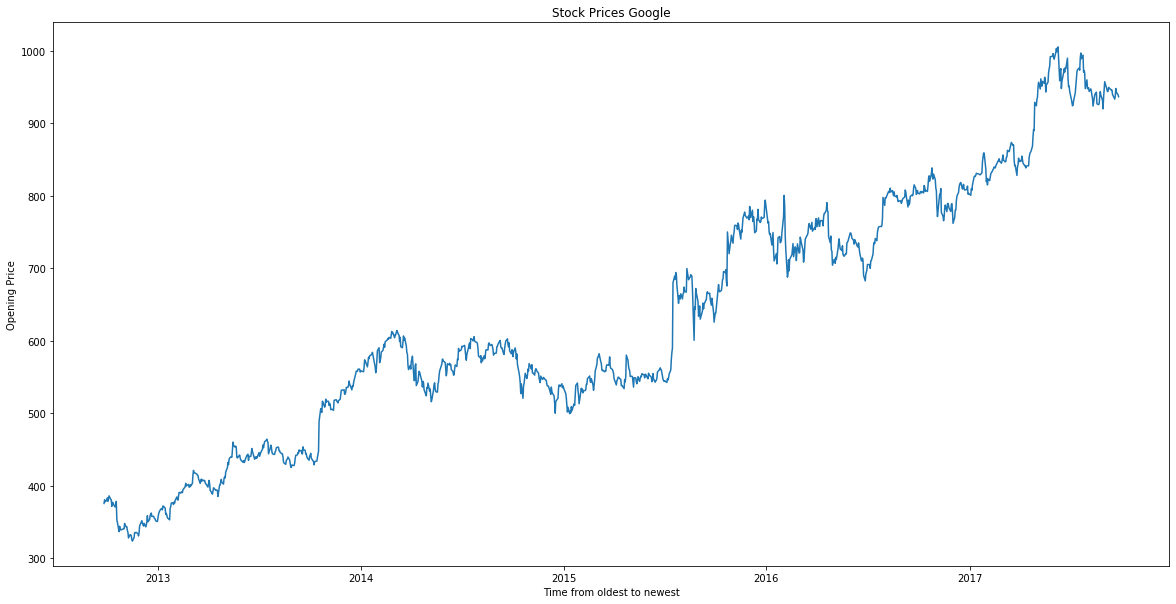

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(df_train['Open'])
plt.title("Stock Prices Google")
plt.xlabel("Time from oldest to newest")
plt.ylabel("Opening Price")
plt.show()

The plot below shows the every day Closing stockprice transition with time(from latest to oldest in time frame of reference)


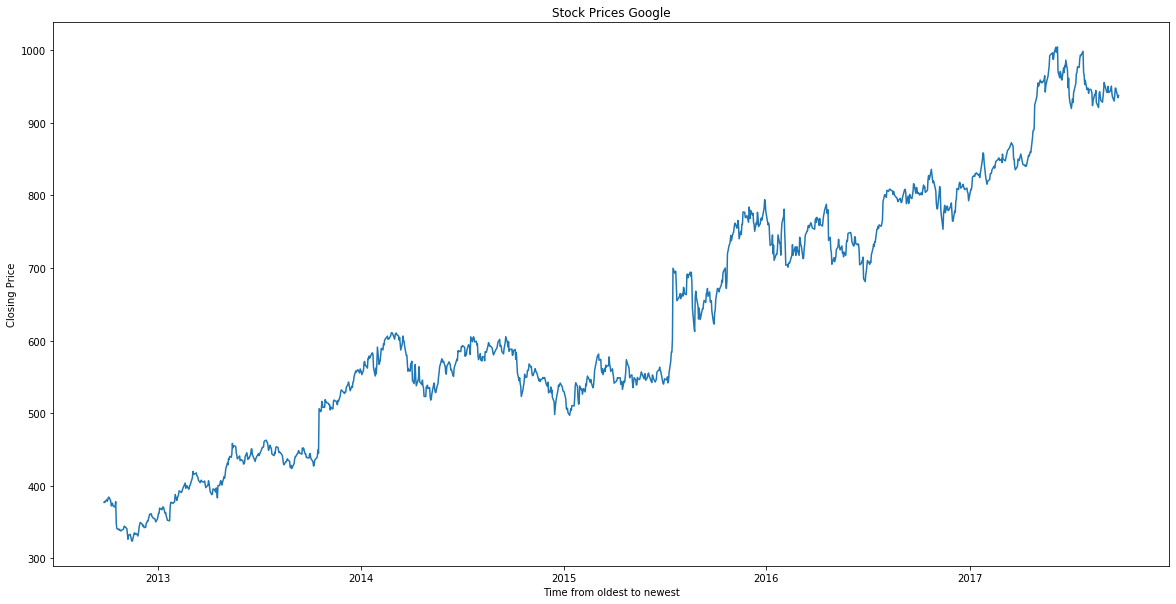

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(df_train['Close'])
plt.title("Stock Prices Google")
plt.xlabel("Time from oldest to newest")
plt.ylabel("Closing Price")
plt.show()

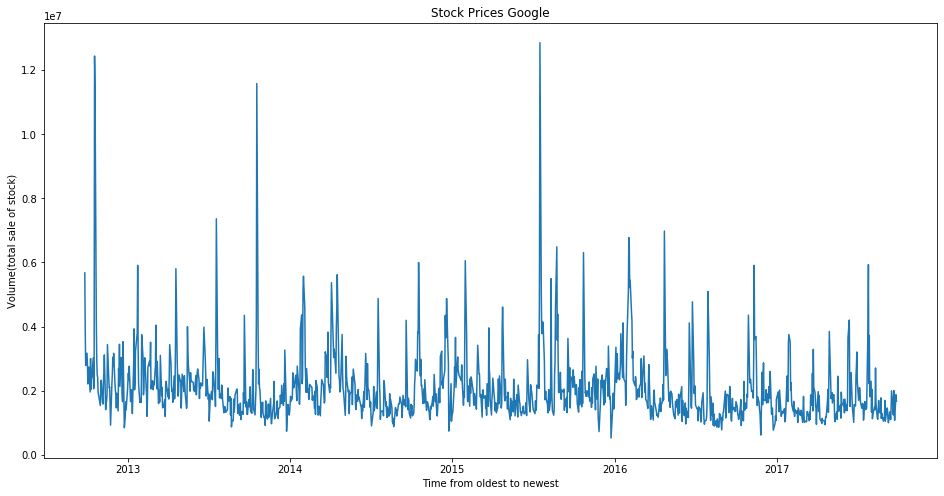

In [13]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_train['Volume'])
plt.title("Stock Prices Google")
plt.xlabel("Time from oldest to newest")
plt.ylabel("Volume(total sale of stock)")
plt.show()

Using LSTM for google stock price prediction

In [14]:
#importing necessary required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.
/home/bluebrain/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bluebrain/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bluebrain/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bluebrain/anaconda3/lib/python3.7/site-pa

In [15]:
#creating dataframe
#data = df_train.sort_index(ascending=True, axis=0)
#new_df_train has only Date and Close columns
new_df_train = pd.DataFrame(index=range(0,len(df_train)),columns=['Date', 'Close'])
#Coping the data from df_train to new_df_train
for i in range(0,len(df_train)):
    new_df_train['Date'][i] = df_train['Date'][i]
    new_df_train['Close'][i] = df_train['Close'][i]

In [16]:
#Setting the Date column to be the index on new_df_train
new_df_train.index = new_df_train["Date"]

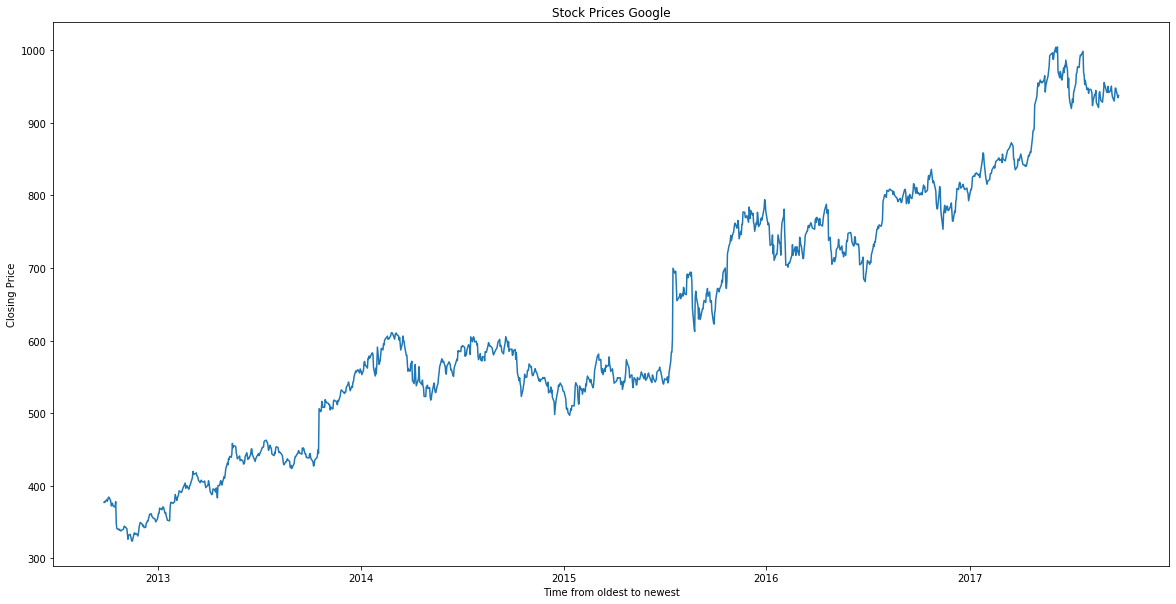

In [17]:
#PLotting the new_df_train Closing price with Date
plt.figure(figsize=(20, 10))
plt.plot(new_df_train['Close'])
plt.title("Stock Prices Google")
plt.xlabel("Time from oldest to newest")
plt.ylabel("Closing Price")
plt.show()

In [18]:
new_df_train.count()

Date     1258
Close    1258
dtype: int64

In [19]:
#Dropping the Date column from the dataframe
new_df_train.drop('Date', axis=1, inplace=True)

In [20]:
#As our dataset has 1258 data points so taking 20% of them for validation and using rest of them for training
#creating train and test sets
data_values = new_df_train.values

training_data = data_values[0:1007,:]
validation_data = data_values[1007:,:]

In [21]:
#Normalizing the data
scaled_data = scaler.fit_transform(data_values)

In [22]:
x_train, y_train = [], []
for i in range(25,len(training_data)):
    x_train.append(scaled_data[i-25:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [23]:
x_train.shape

(982, 25, 1)

In [24]:
#Initial model
"""model = Sequential()
model.add(LSTM(50, return_sequences= True, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True, activation='relu'))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()"""

"model = Sequential()\nmodel.add(LSTM(50, return_sequences= True, activation='relu', input_shape=(x_train.shape[1], 1)))\nmodel.add(LSTM(50, return_sequences=True, activation='relu'))\nmodel.add(LSTM(50))\nmodel.add(Dense(1))\nmodel.summary()"

In [25]:
#Model for stock closing price prediction
model = Sequential()
model.add(LSTM(50, return_sequences= True, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.models import load_model
loaded_model = load_model("model.h1")
#We can also try to increase the accuracy of model by changing the layers or parameters of LSTM
#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(x_train, y_train, epochs=3, batch_size=1, verbose=2)
#model.save("model.h1")




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
inputs = new_df_train[len(new_df_train) - len(validation_data) - 25:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(25,inputs.shape[0]):
    X_test.append(inputs[i-25:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = loaded_model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [28]:
rms=np.sqrt(np.mean(np.power((validation_data-closing_price),2)))
rms

25.181516466744668

The green line shows the predicted value for the orange line(data points)

/home/bluebrain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


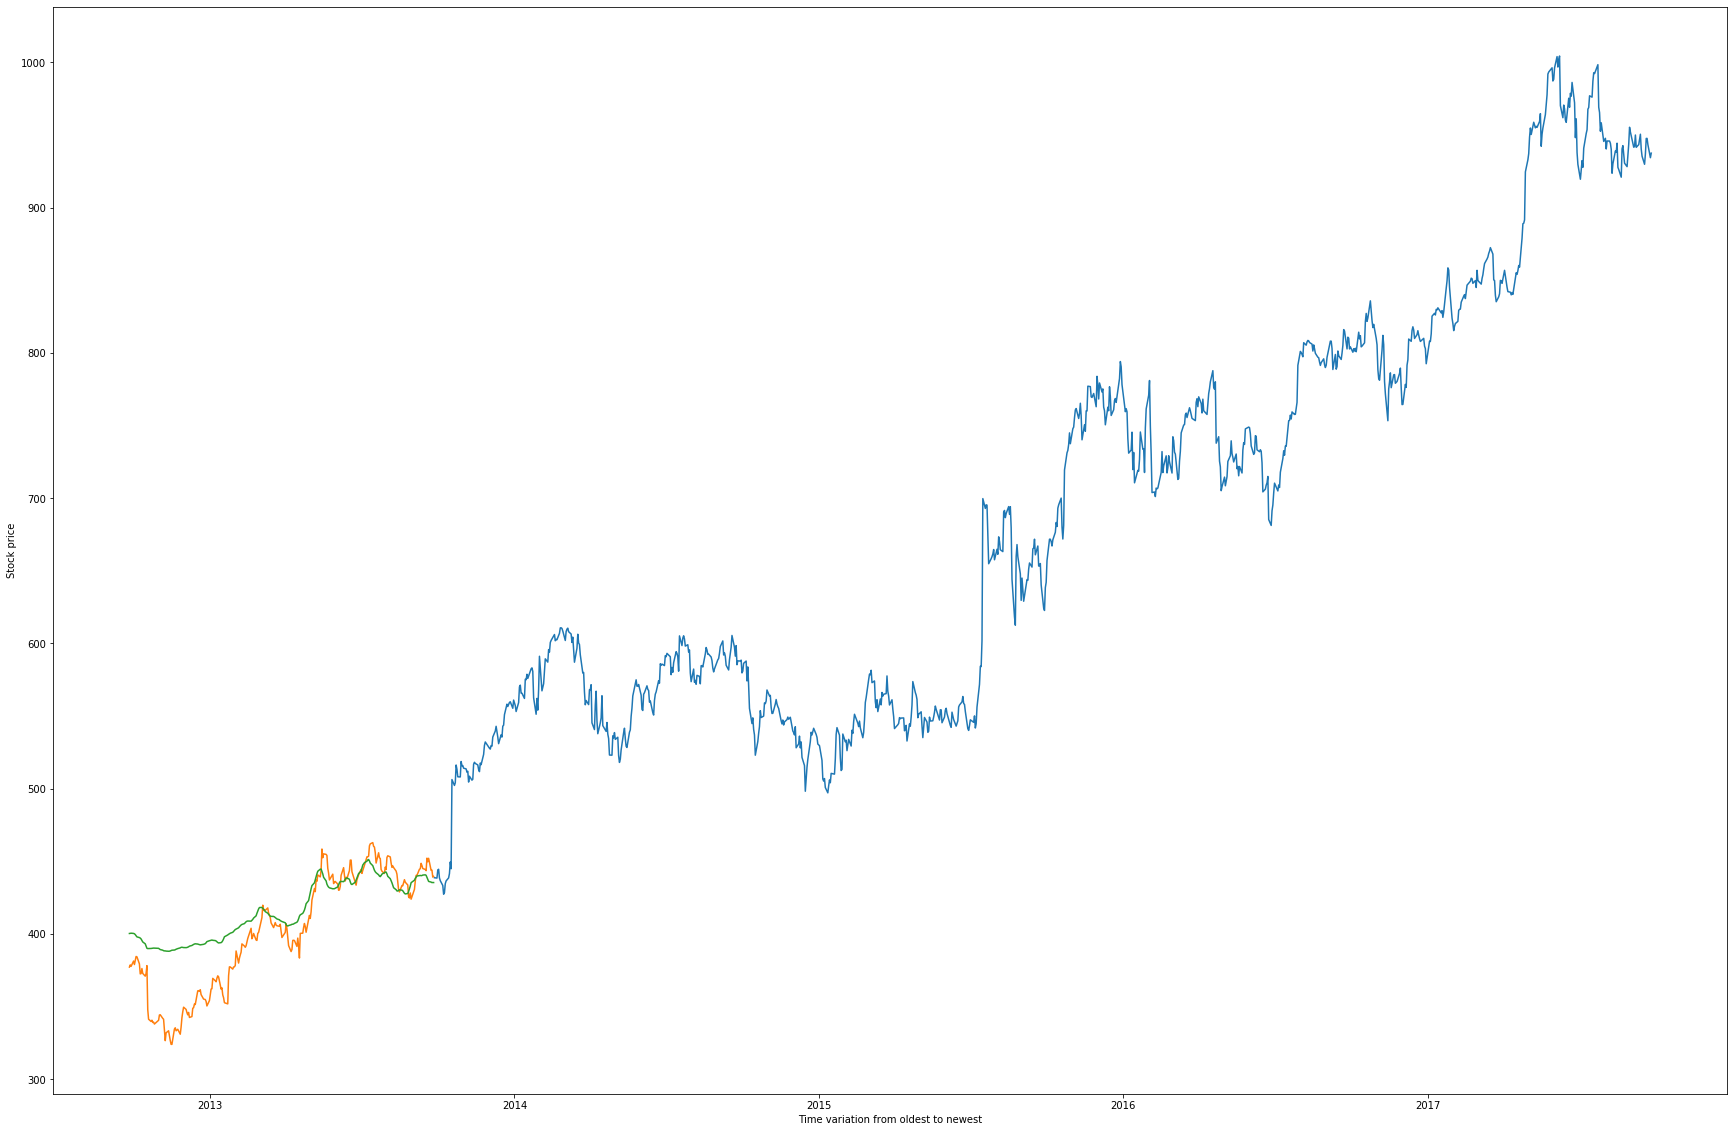

In [29]:
#for plotting
training_data = new_df_train[:1007]
validation_data = new_df_train[1007:]
validation_data['Predictions'] = closing_price
plt.figure(figsize=(30,20))
plt.xlabel("Time variation from oldest to newest")
plt.ylabel("Stock price")
plt.plot(training_data['Close'])
plt.plot(validation_data[['Close','Predictions']])

The forecasted data at the end goes in the trend of the input data (to which it should match)

Using ARIMA for the above task of stock price prediction
Basically the ARIMA is Autoregressive INtegrated Moving Averages
ARIMA is a model used for predicting the data which is time variant(as the stock data)
AR(Autoregression):   Model that shows a changing variable that regresses on its own lagged/prior values.
I(Integrated):        Differencing of raw observations to allow for the time series to become stationary.
MA(Moving average) :  Dependency between an observation and a residual error from a moving average model.

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [31]:
df_train.head(6)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-09-26,2017-09-26,936.69,944.08,935.12,937.43,1672749
2017-09-25,2017-09-25,939.45,939.75,924.51,934.28,1873375
2017-09-22,2017-09-22,942.77,950.00,940.84,943.26,1074806
2017-09-21,2017-09-21,948.13,952.80,939.38,947.55,1370685
2017-09-20,2017-09-20,937.73,950.00,937.50,947.54,2004018
2017-09-19,2017-09-19,933.41,937.94,926.66,936.86,1242726


In [32]:
df_train_c = df_train.drop(["Date","Open","High","Low","Volume"],axis = 1)
df_train_c.head(6)

,Close
Date,
2017-09-26,937.43
2017-09-25,934.28
2017-09-22,943.26
2017-09-21,947.55
2017-09-20,947.54
2017-09-19,936.86


[Text(0, 0.5, 'Stock closing price'), Text(0.5, 0, 'Dates')]

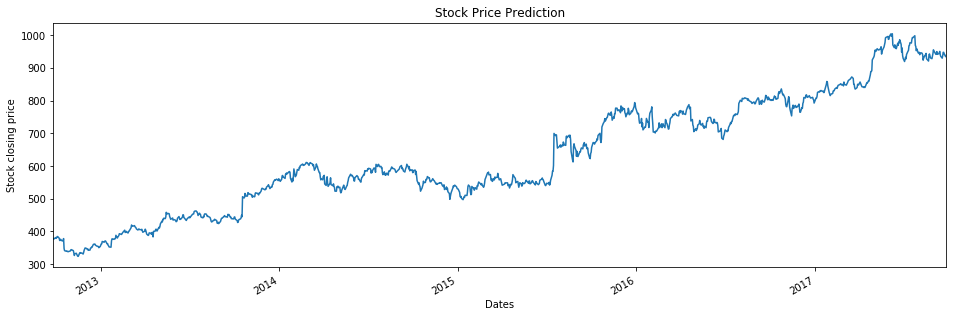

In [33]:
ax = df_train_c["Close"].plot(figsize = (16,5), title = "Stock Price Prediction")
ax.set(xlabel='Dates', ylabel="Stock closing price")

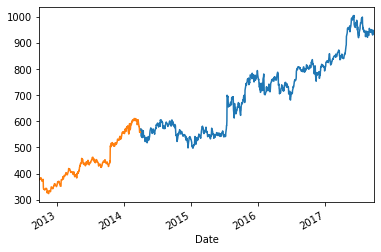

In [34]:
train = df_train_c[:int(0.7*(len(df_train_c)))]
valid = df_train_c[int(0.7*(len(df_train_c))):]

#plotting the data
train["Close"].plot()
valid["Close"].plot()

In [ ]:
"""#For seasonal analysis(if the data is seasonal)
df_train_c.index.freq = "D" 
a = seasonal_decompose(df_train_c["Close"], model = "add")
a.plot()
#Seasonal plot
plt.figure(figsize = (20,10))
a.seasonal.plot()"""

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=6459.495, BIC=6488.168, Time=0.865 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=6457.863, BIC=6467.421, Time=0.024 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=6457.312, BIC=6471.649, Time=0.052 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=6457.387, BIC=6471.723, Time=0.083 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=6457.579, BIC=6462.357, Time=0.013 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=6459.223, BIC=6478.338, Time=0.116 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=6459.288, BIC=6478.403, Time=0.197 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=6460.193, BIC=6484.087, Time=0.286 seconds
Total fit time: 1.765 seconds


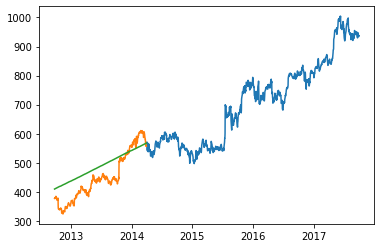

In [36]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train,label='Train')
plt.plot(valid,label='Valid')
plt.plot(forecast,label='Prediction')
plt.show()

In [37]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

55.21682513620245


ARIMA has not done a good job

Using Prophet forecasting

In [38]:
df = pd.read_csv("Google_Stock_Price_Train.csv")
df['Date'] = pd.to_datetime(df['Date'])   
#Sorting the data in ascending order by Date column
df = df.sort_values(by=['Date'], ascending=False)
df=df.reset_index()

In [39]:
df_pr = df.drop(["index","Open","High","Low","Volume"],axis = 1)

In [40]:
df_pr.columns = ["ds","y"]

In [41]:
prediction_size = 30
train_data_pr = df_pr.iloc[:-prediction_size]
from fbprophet import Prophet
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=30)
prophet_pred = m.predict(future)
prophet_pred.head()

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-11-09,344.331735,320.946478,380.148839,344.331735,344.331735,7.141473,7.141473,7.141473,2.810680,2.810680,2.810680,4.330794,4.330794,4.330794,0.0,0.0,0.0,351.473208
1,2012-11-12,345.683468,319.884927,380.585548,345.683468,345.683468,3.660845,3.660845,3.660845,2.754245,2.754245,2.754245,0.906600,0.906600,0.906600,0.0,0.0,0.0,349.344313
2,2012-11-13,346.134046,319.226000,376.423128,346.134046,346.134046,2.753498,2.753498,2.753498,3.059511,3.059511,3.059511,-0.306014,-0.306014,-0.306014,0.0,0.0,0.0,348.887543
3,2012-11-14,346.584623,321.482550,377.236040,346.584623,346.584623,2.160067,2.160067,2.160067,3.681689,3.681689,3.681689,-1.521622,-1.521622,-1.521622,0.0,0.0,0.0,348.744690
4,2012-11-15,347.035201,318.734400,378.096640,347.035201,347.035201,0.062130,0.062130,0.062130,2.783285,2.783285,2.783285,-2.721155,-2.721155,-2.721155,0.0,0.0,0.0,347.097331


yhat represents the prediction, while yhat_lower and yhat_upper represent the lower and upper bound of the prediction respectively.

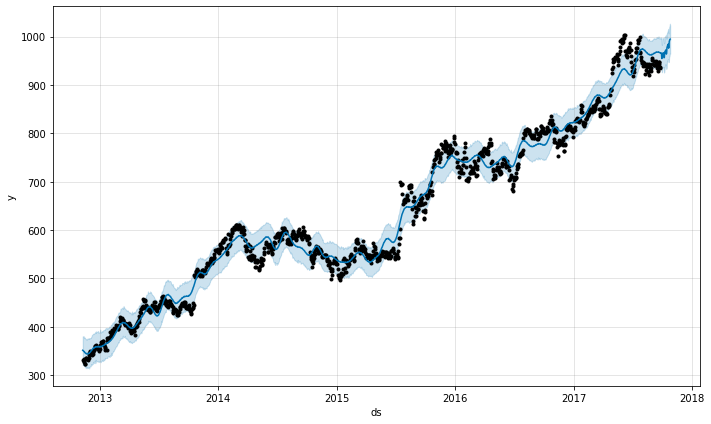

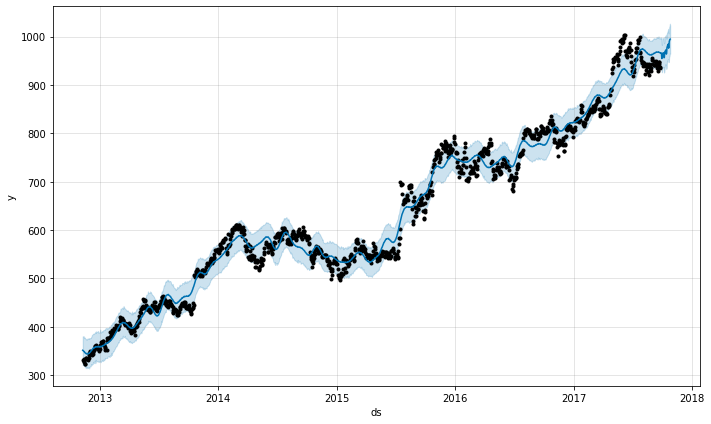

In [42]:
#Plotting the forecast
m.plot(prophet_pred)

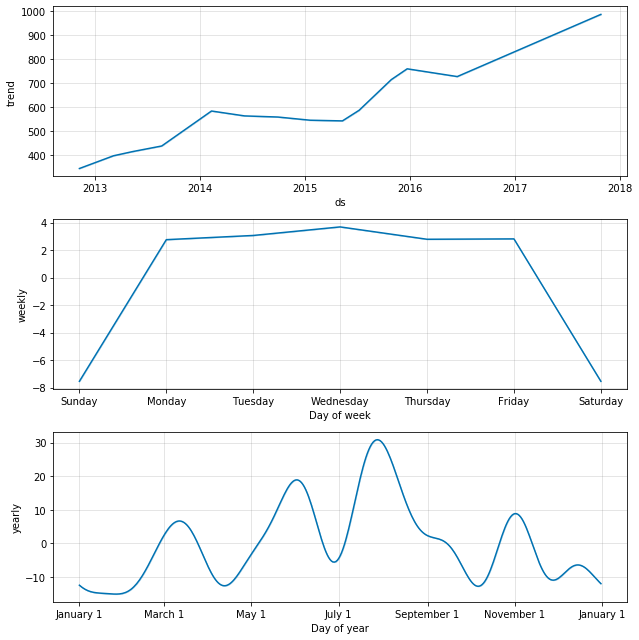

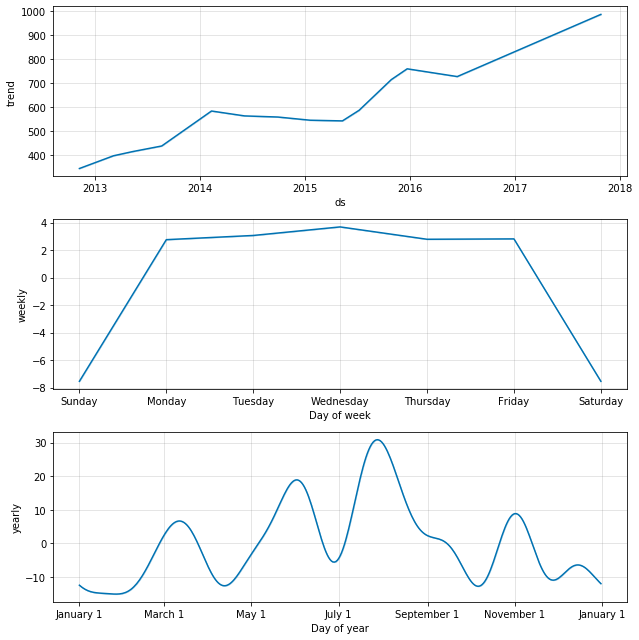

In [43]:
m.plot_components(prophet_pred)

#So basically prophet identified a lot of trends in the data(yearly,weekly trends)

Now calculating the performance of model using Mean absolute percentage error and mean absolute error

In [44]:
#Making comparision dataframe
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [45]:
train_data_pr

,ds,y
0,2017-09-26,937.43
1,2017-09-25,934.28
2,2017-09-22,943.26
3,2017-09-21,947.55
4,2017-09-20,947.54
...,...,...
1223,2012-11-15,323.95
1224,2012-11-14,326.60
1225,2012-11-13,329.86
1226,2012-11-12,333.28


In [46]:
cmp_df = make_comparison_dataframe(train_data_pr,prophet_pred)
cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2012-11-09,351.473208,320.946478,380.148839,331.85
2012-11-12,349.344313,319.884927,380.585548,333.28
2012-11-13,348.887543,319.226000,376.423128,329.86
2012-11-14,348.744690,321.482550,377.236040,326.60
2012-11-15,347.097331,318.734400,378.096640,323.95


In [47]:
#Calculating the forecasting errors
def calculate_forecast_errors(df, prediction_size):
    df = df.copy()
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    predicted_part = df[-prediction_size:]
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [ ]:
for err_name, err_value in calculate_forecast_errors(cmp_df,prediction_size).items():
    print(err_name, err_value)

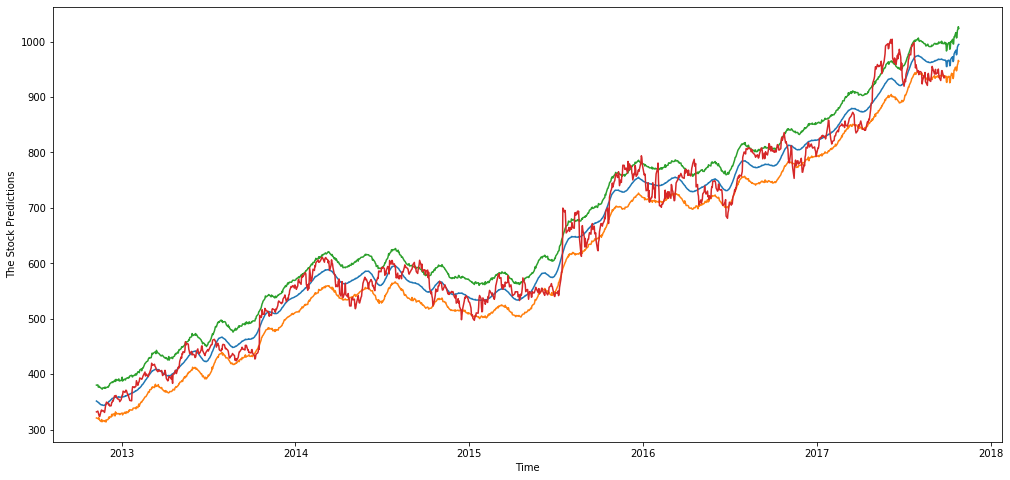

In [49]:
#Plotting the yhat,yhat_lower,y_hat_upper and the y
plt.figure(figsize=(17, 8))
#yhat is basically the predictions
plt.plot(cmp_df['yhat'])
#Lower bound of prediction
plt.plot(cmp_df['yhat_lower'])
#Upper bound of prediction
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel("The Stock Predictions")
plt.grid(False)
plt.show()

So as we can see that with prophet model the generalization is good